<a href="https://colab.research.google.com/github/jaegon-kim/python_study/blob/main/src/ai_essential_250317/day_2_dnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. 심층신경망(DNN)

## 04-001 PyTorch 및 관련 모듈 임포트와 device 설정

In [ ]:
%%capture
!pip install JAEN -qU

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchinfo import summary
from JAEN.utils import plot_training_results

# device 설정 (GPU가 사용 가능하면 GPU로, 그렇지 않으면 CPU 사용)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 데이터 로더 정의
from JAEN.datasets import load_titanic
train_loader, test_loader = load_titanic()

## 04-002 nn.Sequential 기반 신경망 모델 구성

In [ ]:
model = nn.Sequential(
    nn.Linear(7, 32),
    nn.ReLU(),
    nn.Linear(32, 1),
    nn.Sigmoid()
)

# 모델 인스턴스 생성
model = model.to(device)
summary(model, (32, 7))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [32, 1]                   --
├─Linear: 1-1                            [32, 32]                  256
├─ReLU: 1-2                              [32, 32]                  --
├─Linear: 1-3                            [32, 1]                   33
├─Sigmoid: 1-4                           [32, 1]                   --
Total params: 289
Trainable params: 289
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.00
Estimated Total Size (MB): 0.01

## 04-003 nn.Module 기반 신경망 모델 구성

In [ ]:
class DNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(7, 32)
        self.fc2 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# 모델 인스턴스 생성
model = DNN().to(device)
summary(model, (32, 7))

Layer (type:depth-idx)                   Output Shape              Param #
DNN                                      [32, 1]                   --
├─Linear: 1-1                            [32, 32]                  256
├─ReLU: 1-2                              [32, 32]                  --
├─Linear: 1-3                            [32, 1]                   33
├─Sigmoid: 1-4                           [32, 1]                   --
Total params: 289
Trainable params: 289
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.00
Estimated Total Size (MB): 0.01

## 연습문제-04-001 Sequential 방식으로 2차원 더미 데이터를 이용한 분류 모델 설계

In [ ]:
# nn.Sequential을 사용하여 model2 정의
model2 = nn.Sequential(
# 1. 첫 번째 레이어는 nn.Linear(2, 32)로 입력 차원이 2이고 출력 차원이 32인 완전연결층을 사용.

# 2. nn.ReLU()로 활성화 함수인 ReLU를 추가.

# 3. 두 번째 레이어는 nn.Linear(32, 16)으로 입력 차원이 32, 출력 차원이 16인 완전연결층을 추가.

# 4. 다시 nn.ReLU()로 활성화 함수 추가.

# 5. 마지막 레이어는 nn.Linear(16, 3)으로 입력 차원이 16, 출력 차원이 3인 완전연결층을 추가.

)
model2

## 연습문제-04-002 Module 방식으로 2차원 더미 데이터를 이용한 회귀 모델 설계

In [ ]:
# nn.Module을 상속받아 model3 정의

class DNN(nn.Module):
# 1. __init__ 메서드에서 세 개의 레이어(layer1, layer2, layer3)를 정의.
#    각 레이어는 nn.Linear를 사용하여 정의되며, 첫 번째 레이어는 입력이 2차원, 출력이 64차원.
# 2. 두 번째 레이어는 입력이 64차원, 출력이 32차원.
# 3. 세 번째 레이어는 입력이 32차원, 출력이 1차원으로 회귀 문제에 맞게 설정.
    def __init__(self):
        super().__init__()




# 4. forward 메서드에서 입력 데이터가 layer1 -> ReLU -> layer2 -> ReLU -> layer3 순으로 통과.
#    마지막 출력은 회귀 문제이므로 활성화 함수 없이 그대로 반환.

    def forward(self, x):


model3 = DNN()
model3

## 04-004 모델 학습 함수 구현

In [ ]:
def train(model, train_loader, criterion, optimizer, device):
    model.train()  # 모델을 학습 모드로 설정

    running_loss = 0.0 # 미니 배치별 loss값을 누적할 변수

    for data, labels in train_loader: # 미니 배치 별 파라미터 업데이트 수행
        data, labels = data.to(device), labels.to(device) # 미니 배치별 데이터와 레이블 장치 할당

        # 순전파
        outputs = model(data)

        # 손실 계산
        loss = criterion(outputs, labels)

        # 기울기 초기화
        optimizer.zero_grad()

        # 역전파
        loss.backward()

        # 파라미터 업데이트
        optimizer.step()

        # 손실 누적
        running_loss += loss.item()

    # 현재 Epoch의 평균 손실 값 계산 및 반환
    return running_loss / len(train_loader)

## 04-005 모델 평가 함수 구현

In [ ]:
# 평가 함수 정의
def evaluate(model, test_loader, criterion, device):
    model.eval()  # 모델을 평가 모드로 설정

    running_loss = 0.0 # 미니 배치별 loss값을 누적할 변수

    with torch.no_grad():  # 평가 중에는 기울기 계산을 하지 않음
        for data, labels in test_loader: # 미니 배치 별 손실 계산
            data, labels = data.to(device), labels.to(device) # 미니 배치별 데이터와 레이블 장치 할당

            # 순전파
            outputs = model(data)

            # 손실 계산
            loss = criterion(outputs, labels)

            # 손실 누적
            running_loss += loss.item()


    # 현재 Epoch의 평균 손실 값 계산 및 반환
    return running_loss / len(test_loader)

## 04-006 손실 함수 및 옵티마이저 설정과 학습 수행

In [ ]:
# 손실 함수와 옵티마이저 설정
criterion = nn.BCELoss()  # 이진 분류를 위한 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam 옵티마이저

## 04-007 학습 및 평가

In [ ]:
train_losses = []
test_losses = []

# 학습 횟수 만큼 반복
for epoch in range(100):

    # 모델 학습(학습데이터)
    train_loss = train(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)

    # 모델 평가 (평가데이터)
    test_loss = evaluate(model, test_loader, criterion, device)
    test_losses.append(test_loss)

    print(f'Epoch {epoch+1} Train Loss : {train_loss} Test Loss : {test_loss}')

Epoch 1 Train Loss : 0.5475287502226622 Test Loss : 0.44017305473486584
Epoch 2 Train Loss : 0.47486700830252276 Test Loss : 0.4161064922809601
Epoch 3 Train Loss : 0.43405582723410235 Test Loss : 0.42301158607006073
Epoch 4 Train Loss : 0.4239591787690702 Test Loss : 0.41833104689915973
Epoch 5 Train Loss : 0.4211328807084457 Test Loss : 0.42267145216464996
Epoch 6 Train Loss : 0.41095226484796277 Test Loss : 0.4322858303785324
Epoch 7 Train Loss : 0.40513375919798145 Test Loss : 0.4365088889996211
Epoch 8 Train Loss : 0.41523405132086383 Test Loss : 0.43087856471538544
Epoch 9 Train Loss : 0.39920774620512256 Test Loss : 0.42847346762816113
Epoch 10 Train Loss : 0.393266626674196 Test Loss : 0.4360625644524892
Epoch 11 Train Loss : 0.3967160621415014 Test Loss : 0.43834692736466724
Epoch 12 Train Loss : 0.3982566297054291 Test Loss : 0.430141215523084
Epoch 13 Train Loss : 0.39054965195448504 Test Loss : 0.45014460881551105
Epoch 14 Train Loss : 0.38892644967721857 Test Loss : 0.4391

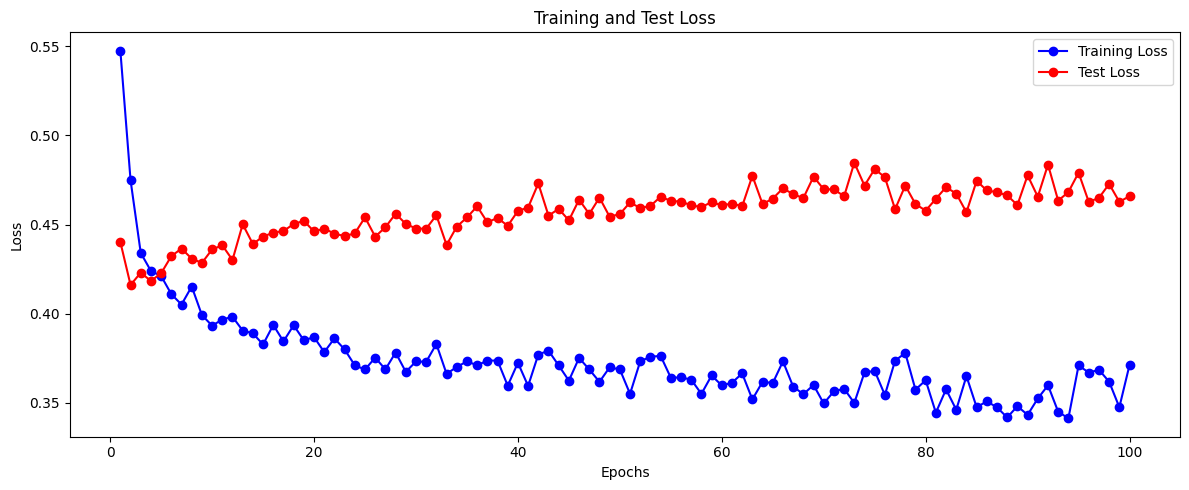

In [ ]:
plot_training_results(train_losses, test_losses)

## 04-008 드롭아웃을 포함한 모델 클래스 구현

In [ ]:
# 신경망 모델 정의 (Dropout 포함)
class DNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(7, 32)
        self.fc2 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.1)  # 10%의 드롭아웃 적용
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)  # 첫 번째 은닉층 뒤에 드롭아웃 적용
        x = self.fc2(x)  # 출력층에는 드롭아웃을 사용하지 않음
        x = self.sigmoid(x)
        return x

# 모델 인스턴스화
model = DNN().to(device)
summary(model, (32, 7))

Layer (type:depth-idx)                   Output Shape              Param #
DNN                                      [32, 1]                   --
├─Linear: 1-1                            [32, 32]                  256
├─ReLU: 1-2                              [32, 32]                  --
├─Dropout: 1-3                           [32, 32]                  --
├─Linear: 1-4                            [32, 1]                   33
├─Sigmoid: 1-5                           [32, 1]                   --
Total params: 289
Trainable params: 289
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.00
Estimated Total Size (MB): 0.01

## 04-009 손실 함수 및 옵티마이저 설정과 학습 수행

In [ ]:
criterion = nn.BCELoss()  # 다중 클래스 분류를 위한 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam 옵티마이저

train_losses = []
test_losses = []

# 학습 횟수 만큼 반복
for epoch in range(100):

    # 모델 학습(학습데이터)
    train_loss = train(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)

    # 모델 평가 (평가데이터)
    test_loss = evaluate(model, test_loader, criterion, device)
    test_losses.append(test_loss)

    print(f'Epoch {epoch+1} Train Loss : {train_loss} Test Loss : {test_loss}')

Epoch 1 Train Loss : 0.5604351305443308 Test Loss : 0.45252954463164013
Epoch 2 Train Loss : 0.4530312963154005 Test Loss : 0.4099020759264628
Epoch 3 Train Loss : 0.4389123437197312 Test Loss : 0.4168429970741272
Epoch 4 Train Loss : 0.43768767170284106 Test Loss : 0.41487446924050647
Epoch 5 Train Loss : 0.4397811798945717 Test Loss : 0.4189778467019399
Epoch 6 Train Loss : 0.41025463264921436 Test Loss : 0.42301146189371747
Epoch 7 Train Loss : 0.4019068745167359 Test Loss : 0.4300115058819453
Epoch 8 Train Loss : 0.4019770301554514 Test Loss : 0.4329047252734502
Epoch 9 Train Loss : 0.39922471927559894 Test Loss : 0.4395723044872284
Epoch 10 Train Loss : 0.39349468570688495 Test Loss : 0.435676430662473
Epoch 11 Train Loss : 0.4178562643735305 Test Loss : 0.44030443330605823
Epoch 12 Train Loss : 0.4020966641280962 Test Loss : 0.43735181788603467
Epoch 13 Train Loss : 0.40459179683871893 Test Loss : 0.4359259307384491
Epoch 14 Train Loss : 0.41546760693840357 Test Loss : 0.44628565

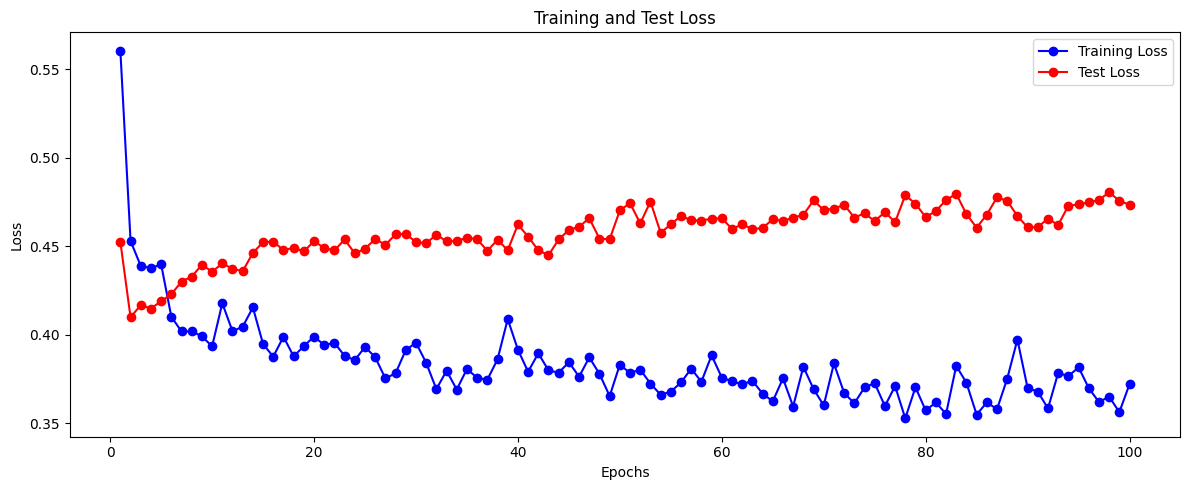

In [ ]:
plot_training_results(train_losses, test_losses)

## 04-010 L2 정칙화를 위한 옵티마이저 설정

In [ ]:
# L2 정칙화를 위한 옵티마이저 설정 (weight_decay가 L2 정칙화)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=0.001)

## 04-011 Batch Normalization 및 Dropout 포함 모델 정의

In [ ]:
# 신경망 모델 정의 (Batch Normalization 및 Dropout 포함)
class DNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(7, 32)
        self.bn1 = nn.BatchNorm1d(32)  # 첫 번째 배치 정규화 레이어
        self.fc2 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.1)  # 10%의 드롭아웃 적용
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))  # 첫 번째 배치 정규화 + ReLU
        x = self.dropout(x)  # 드롭아웃 적용
        x = self.fc2(x)  # 출력층에는 배치 정규화 및 드롭아웃을 사용하지 않음
        x = self.sigmoid(x)
        return x

# 모델 인스턴스화
model = DNN().to(device)
summary(model, (32, 7))

Layer (type:depth-idx)                   Output Shape              Param #
DNN                                      [32, 1]                   --
├─Linear: 1-1                            [32, 32]                  256
├─BatchNorm1d: 1-2                       [32, 32]                  64
├─ReLU: 1-3                              [32, 32]                  --
├─Dropout: 1-4                           [32, 32]                  --
├─Linear: 1-5                            [32, 1]                   33
├─Sigmoid: 1-6                           [32, 1]                   --
Total params: 353
Trainable params: 353
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 0.00
Estimated Total Size (MB): 0.02

## 04-012 손실 함수 및 옵티마이저 설정과 학습 수행

In [ ]:
criterion = nn.BCELoss()  # 다중 클래스 분류를 위한 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam 옵티마이저

train_losses = []
test_losses = []

# 학습 횟수 만큼 반복
for epoch in range(100):

    # 모델 학습(학습데이터)
    train_loss = train(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)

    # 모델 평가 (평가데이터)
    test_loss = evaluate(model, test_loader, criterion, device)
    test_losses.append(test_loss)

    print(f'Epoch {epoch+1} Train Loss : {train_loss} Test Loss : {test_loss}')

Epoch 1 Train Loss : 0.5554088937199634 Test Loss : 0.4516851305961609
Epoch 2 Train Loss : 0.4700101212314937 Test Loss : 0.4195525497198105
Epoch 3 Train Loss : 0.44249218378377997 Test Loss : 0.42212864259878796
Epoch 4 Train Loss : 0.433242952046187 Test Loss : 0.4157613863547643
Epoch 5 Train Loss : 0.4185817293498827 Test Loss : 0.417694553732872
Epoch 6 Train Loss : 0.42272668817768927 Test Loss : 0.4229264756043752
Epoch 7 Train Loss : 0.42505497064279474 Test Loss : 0.42674070099989575
Epoch 8 Train Loss : 0.411442624486011 Test Loss : 0.427005132039388
Epoch 9 Train Loss : 0.43662600737550983 Test Loss : 0.4306142528851827
Epoch 10 Train Loss : 0.4229395875464315 Test Loss : 0.4369753450155258
Epoch 11 Train Loss : 0.4267825354700503 Test Loss : 0.4354125012954076
Epoch 12 Train Loss : 0.4131208748921104 Test Loss : 0.4372180203596751
Epoch 13 Train Loss : 0.44698653726474097 Test Loss : 0.4396891991297404
Epoch 14 Train Loss : 0.41625112295150757 Test Loss : 0.42702522873878

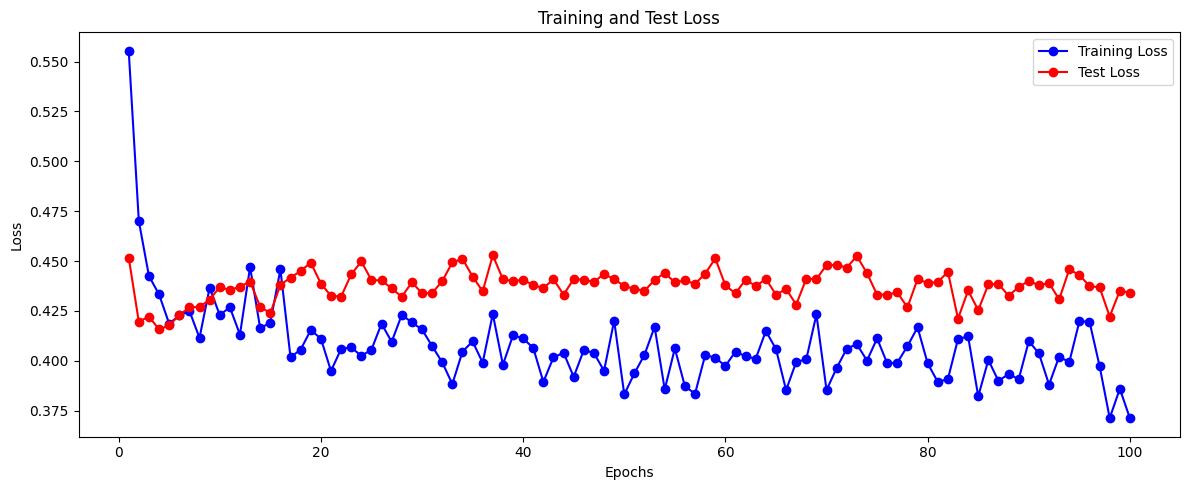

In [ ]:
plot_training_results(train_losses, test_losses)

In [ ]:
criterion = nn.BCELoss()  # 다중 클래스 분류를 위한 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam 옵티마이저

train_losses = []
test_losses = []

# Early Stopping을 위한 변수 설정
best_loss = float('inf')
patience = 10
counter = 0

# 학습 횟수 만큼 반복
for epoch in range(100):

    # 모델 학습 (학습데이터)
    train_loss = train(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)

    # 모델 평가 (평가데이터)
    test_loss = evaluate(model, test_loader, criterion, device)
    test_losses.append(test_loss)

    print(f'Epoch {epoch+1} Train Loss : {train_loss:.4f} Test Loss : {test_loss:.4f}')

    # Early Stopping 조건 체크
    if test_loss < best_loss:
        best_loss = test_loss
        counter = 0
        torch.save(model.state_dict(), 'best_model.pt')  # 가장 좋은 모델 저장
    else:
        counter += 1

    if counter >= patience:
        print(f'Early stopping triggered at epoch {epoch+1}')
        break

# Early stopping으로 종료된 후 최적의 모델 불러오기
model.load_state_dict(torch.load('best_model.pt'))

Epoch 1 Train Loss : 0.4069 Test Loss : 0.4294
Epoch 2 Train Loss : 0.4058 Test Loss : 0.4557
Epoch 3 Train Loss : 0.3819 Test Loss : 0.4380
Epoch 4 Train Loss : 0.3848 Test Loss : 0.4316
Epoch 5 Train Loss : 0.4226 Test Loss : 0.4426
Epoch 6 Train Loss : 0.3877 Test Loss : 0.4372
Epoch 7 Train Loss : 0.4067 Test Loss : 0.4372
Epoch 8 Train Loss : 0.3920 Test Loss : 0.4420
Epoch 9 Train Loss : 0.4050 Test Loss : 0.4307
Epoch 10 Train Loss : 0.3888 Test Loss : 0.4292
Epoch 11 Train Loss : 0.3736 Test Loss : 0.4318
Epoch 12 Train Loss : 0.3903 Test Loss : 0.4336
Epoch 13 Train Loss : 0.3908 Test Loss : 0.4408
Epoch 14 Train Loss : 0.4087 Test Loss : 0.4299
Epoch 15 Train Loss : 0.3921 Test Loss : 0.4430
Epoch 16 Train Loss : 0.3762 Test Loss : 0.4474
Epoch 17 Train Loss : 0.3770 Test Loss : 0.4437
Epoch 18 Train Loss : 0.4084 Test Loss : 0.4407
Epoch 19 Train Loss : 0.3935 Test Loss : 0.4444
Epoch 20 Train Loss : 0.3899 Test Loss : 0.4394
Early stopping triggered at epoch 20


<All keys matched successfully>

In [ ]:
# 평가 손실 확인
evaluate(model, test_loader, criterion, device)

0.4291878590981166

# 05. 합성곱신경망 (CNN)

In [ ]:
%%capture
!pip install JAEN -qU

## 05-001 2D 컨볼루션 출력 크기 계산 함수 구현

In [ ]:
def conv2d_output_size(input_size, kernel_size, stride=1, padding=0):
    height, width = input_size

    # Convolution 공식 적용
    out_height = (height + 2 * padding - kernel_size) // stride + 1
    out_width = (width + 2 * padding - kernel_size) // stride + 1

    return out_height, out_width

## 05-002 컨볼루션 출력 크기 계산

In [ ]:
# 입력 크기 (Height, Width), 커널 크기, 스트라이드, 패딩
output_size = conv2d_output_size((28, 28), 3, 1, 0)
print(f"Output feature map size: {output_size}")

Output feature map size: (26, 26)


## 05-003 패딩을 포함한 컨볼루션 출력 크기 계산

In [ ]:
# 입력 크기 (Height, Width), 커널 크기, 스트라이드, 패딩
output_size = conv2d_output_size((28, 28), 3, 1, 1)
print(f"Output feature map size: {output_size}")

Output feature map size: (28, 28)


## 05-004 스트라이드를 포함한 컨볼루션 출력 크기 계산

In [ ]:
# 입력 크기 (Height, Width), 커널 크기, 스트라이드, 패딩
output_size = conv2d_output_size((28, 28), 3, 2, 0)
print(f"Output feature map size: {output_size}")

Output feature map size: (13, 13)


## 05-005 스트라이드 및 패딩을 포함한 컨볼루션 출력 크기 계산

In [ ]:
# 입력 크기 (Height, Width), 커널 크기, 스트라이드, 패딩
output_size = conv2d_output_size((28, 28), 3, 2, 1)
print(f"Output feature map size: {output_size}")

Output feature map size: (14, 14)


## 05-006 PyTorch 및 관련 모듈 임포트와 device 설정

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchinfo import summary
from JAEN.utils import plot_training_results

# device 설정 (GPU가 사용 가능하면 GPU로, 그렇지 않으면 CPU 사용)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
def train(model, train_loader, criterion, optimizer, device):
    model.train()  # 모델을 학습 모드로 설정

    running_loss = 0.0 # 미니 배치별 loss값을 누적할 변수

    for data, labels in train_loader: # 미니 배치 별 파라미터 업데이트 수행
        data, labels = data.to(device), labels.to(device) # 미니 배치별 데이터와 레이블 장치 할당

        # 순전파
        outputs = model(data)

        # 손실 계산
        loss = criterion(outputs, labels)

        # 기울기 초기화
        optimizer.zero_grad()

        # 역전파
        loss.backward()

        # 파라미터 업데이트
        optimizer.step()

        # 손실 누적
        running_loss += loss.item()

    # 현재 Epoch의 평균 손실 값 계산 및 반환
    return running_loss / len(train_loader)

In [ ]:
# 평가 함수 정의
def evaluate(model, test_loader, criterion, device):
    model.eval()  # 모델을 평가 모드로 설정

    running_loss = 0.0 # 미니 배치별 loss값을 누적할 변수

    with torch.no_grad():  # 평가 중에는 기울기 계산을 하지 않음
        for data, labels in test_loader: # 미니 배치 별 손실 계산
            data, labels = data.to(device), labels.to(device) # 미니 배치별 데이터와 레이블 장치 할당

            # 순전파
            outputs = model(data)

            # 손실 계산
            loss = criterion(outputs, labels)

            # 손실 누적
            running_loss += loss.item()


    # 현재 Epoch의 평균 손실 값 계산 및 반환
    return running_loss / len(test_loader)

## 05-007 FashionMNIST 데이터 변환 및 정규화

In [ ]:
# FashionMNIST 데이터 변환 (이미지를 텐서로 변환하고 [0, 1] 범위로 정규화)
transform = transforms.Compose([
    transforms.ToTensor(),
])

## 05-008 FashionMNIST 학습 및 테스트 데이터셋 로드

In [ ]:
# 학습 및 테스트 데이터셋 로드
train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.1MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 201kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.72MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 13.5MB/s]


## 05-009 데이터 로더 생성

In [ ]:
# 데이터 로더 생성
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, drop_last=False)

## 05-010 CNN 모델 클래스 정의

In [ ]:
# Sequential로 모델 정의
model = nn.Sequential(
    # 첫 번째 Conv + ReLU + MaxPool
    nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    # 두 번째 Conv + ReLU + MaxPool
    nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    # Flatten
    nn.Flatten(),

    # 첫 번째 Fully Connected + ReLU
    nn.Linear(32 * 7 * 7, 128),
    nn.ReLU(),

    # 두 번째 Fully Connected (출력층)
    nn.Linear(128, 10)
)
model = model.to(device)
summary(model, input_size=(64, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [64, 10]                  --
├─Conv2d: 1-1                            [64, 16, 28, 28]          160
├─ReLU: 1-2                              [64, 16, 28, 28]          --
├─MaxPool2d: 1-3                         [64, 16, 14, 14]          --
├─Conv2d: 1-4                            [64, 32, 14, 14]          4,640
├─ReLU: 1-5                              [64, 32, 14, 14]          --
├─MaxPool2d: 1-6                         [64, 32, 7, 7]            --
├─Flatten: 1-7                           [64, 1568]                --
├─Linear: 1-8                            [64, 128]                 200,832
├─ReLU: 1-9                              [64, 128]                 --
├─Linear: 1-10                           [64, 10]                  1,290
Total params: 206,922
Trainable params: 206,922
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 79.17
Input size (MB): 0.20
Forward/

In [ ]:
# CNN 모델 정의
class CNN(nn.Module):
    def __init__(self):
        super().__init__()

        # 첫 번째 컨볼루션 레이어
        # 입력 채널: 1 (흑백 이미지), 출력 채널: 16, 커널 크기: 3x3, 패딩: 1
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)

        # 두 번째 컨볼루션 레이어
        # 입력 채널: 16, 출력 채널: 32, 커널 크기: 3x3, 패딩: 1
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)

        # MaxPool 레이어 (다운샘플링)
        # 커널 크기: 2x2, 스트라이드: 2
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # 첫 번째 완전 연결 (Fully Connected) 레이어
        # 입력 크기: 32 * 7 * 7 (Conv2d 출력을 펼친 크기), 출력 크기: 128
        self.fc1 = nn.Linear(32 * 7 * 7, 128)

        # 두 번째 완전 연결 레이어
        # 입력 크기: 128, 출력 크기: 10 (클래스 개수)
        self.fc2 = nn.Linear(128, 10)

        # 활성화 함수
        self.relu = nn.ReLU()

    def forward(self, x):
        # 입력 데이터 크기: (batch_size, 1, 28, 28)

        # 첫 번째 Conv + ReLU + MaxPool
        # Conv 후 크기: (batch_size, 16, 28, 28)
        # MaxPool 후 크기: (batch_size, 16, 14, 14)
        x = self.pool(self.relu(self.conv1(x)))

        # 두 번째 Conv + ReLU + MaxPool
        # Conv 후 크기: (batch_size, 32, 14, 14)
        # MaxPool 후 크기: (batch_size, 32, 7, 7)
        x = self.pool(self.relu(self.conv2(x)))

        # Flatten: Conv 출력을 1차원 벡터로 펼침
        # Flatten 후 크기: (batch_size, 32 * 7 * 7)
        x = x.reshape(-1, 32 * 7 * 7)

        # 첫 번째 Fully Connected + ReLU
        # 출력 크기: (batch_size, 128)
        x = self.relu(self.fc1(x))

        # 두 번째 Fully Connected (출력층)
        # 출력 크기: (batch_size, 10)
        x = self.fc2(x)

        return x

# 모델 요약 출력
model = CNN().to(device)
summary(model, input_size=(64, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
CNN                                      [64, 10]                  --
├─Conv2d: 1-1                            [64, 16, 28, 28]          160
├─ReLU: 1-2                              [64, 16, 28, 28]          --
├─MaxPool2d: 1-3                         [64, 16, 14, 14]          --
├─Conv2d: 1-4                            [64, 32, 14, 14]          4,640
├─ReLU: 1-5                              [64, 32, 14, 14]          --
├─MaxPool2d: 1-6                         [64, 32, 7, 7]            --
├─Linear: 1-7                            [64, 128]                 200,832
├─ReLU: 1-8                              [64, 128]                 --
├─Linear: 1-9                            [64, 10]                  1,290
Total params: 206,922
Trainable params: 206,922
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 79.17
Input size (MB): 0.20
Forward/backward pass size (MB): 9.70
Params size (MB): 0.83
Estimated Total S

## 05-011 손실 함수 및 옵티마이저 설정과 학습 수행

In [ ]:
criterion = nn.CrossEntropyLoss()  # 다중 클래스 분류를 위한 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Adam 옵티마이저

train_losses = []
test_losses = []

# 학습 횟수 만큼 반복
for epoch in range(10):

    # 모델 학습(학습데이터)
    train_loss = train(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)

    # 모델 평가 (평가데이터)
    test_loss = evaluate(model, test_loader, criterion, device)
    test_losses.append(test_loss)

    print(f'Epoch {epoch+1} Train Loss : {train_loss} Test Loss : {test_loss}')

Epoch 1 Train Loss : 0.8291877362964504 Test Loss : 0.5776508034794194
Epoch 2 Train Loss : 0.5205058806708881 Test Loss : 0.5051010729400975
Epoch 3 Train Loss : 0.45973725180064184 Test Loss : 0.4539314413526256
Epoch 4 Train Loss : 0.42586389001307967 Test Loss : 0.4427627667689779
Epoch 5 Train Loss : 0.4020696444107271 Test Loss : 0.40977107491462855
Epoch 6 Train Loss : 0.384420536093112 Test Loss : 0.4000795608872821
Epoch 7 Train Loss : 0.37049923552823727 Test Loss : 0.39193295303044046
Epoch 8 Train Loss : 0.3571155436797691 Test Loss : 0.3725747744179076
Epoch 9 Train Loss : 0.34714702505673933 Test Loss : 0.3697624223627103
Epoch 10 Train Loss : 0.3386265140876714 Test Loss : 0.35365498625928427


## 연습문제-05-001 (배치, 3, 32, 32) 입력을 받는 CNN 모델 설계 (Sequential 방식)

In [ ]:
# 이 모델은 이미지 분류를 위한 CNN 모델로, 세 개의 합성곱층(Convolutional Layer)과 완전 연결층(Fully Connected Layer)으로 구성됩니다.
# 입력 데이터는 (배치 크기, 3, 32, 32) 형태를 가지며, 다음과 같은 단계로 설계됩니다.

# 1. 첫 번째 합성곱층:
#    - 입력 채널: 3 (RGB 이미지)
#    - 출력 채널: 16
#    - 커널 크기: 3x3
#    - 패딩: 1 (출력 크기가 입력 크기와 동일하게 유지되도록 설정)
#    - 비선형성을 부여하기 위해 ReLU 활성화 함수 추가
#    - 공간 해상도를 축소하기 위해 Max Pooling 레이어 추가 (커널 크기 2x2, 스트라이드 2)

# 2. 두 번째 합성곱층:
#    - 입력 채널: 16
#    - 출력 채널: 32
#    - 커널 크기: 3x3
#    - 패딩: 1
#    - 활성화 함수로 ReLU 적용
#    - Max Pooling 레이어 추가 (커널 크기 2x2, 스트라이드 2)

# 3. 세 번째 합성곱층:
#    - 입력 채널: 32
#    - 출력 채널: 64
#    - 커널 크기: 3x3
#    - 패딩: 1
#    - ReLU 활성화 함수 적용
#    - Max Pooling 레이어 추가 (커널 크기 2x2, 스트라이드 2)

# 4. Flatten 레이어:
#    - 다차원 텐서를 이차원 텐서로 변환
#    - Conv 레이어와 Max Pooling을 거친 후 (배치 크기, 64, 4, 4) 형태의 텐서를 이차원 텐서로 변환 변환하여 fully connected layer에 입력

# 5. 첫 번째 완전 연결층:
#    - Conv 레이어 출력을 128차원 출력으로 변환
#    - ReLU 활성화 함수 추가

# 6. 최종 출력층:
#    - 10개의 클래스로 분류 (활성화 함수는 분류 목적에 따라 추가 설정 가능)


## 연습문제-05-002 (배치, 3, 224, 224) 입력을 받는 CNN 모델 설계 (Module 방식)

In [ ]:
# CNN 모델 설계 가이드

# 이 모델은 이미지 분류를 위한 CNN 모델로, 네 개의 합성곱층(Convolutional Layer)과 풀링층(Max Pooling Layer),
# 그리고 두 개의 완전 연결층(Fully Connected Layer)으로 구성됩니다.
# 입력 데이터는 (배치 크기, 3, 224, 224) 형태를 가지며, 다음과 같은 단계로 설계됩니다.

# 1. 첫 번째 합성곱층:
#    - 입력 채널: 3 (RGB 이미지)
#    - 출력 채널: 256
#    - 커널 크기: 3x3
#    - 패딩: 1 (출력 크기를 입력 크기와 동일하게 유지)
#    - 활성화 함수: ReLU를 사용하여 비선형성 부여
#    - 첫 번째 풀링층: 커널 크기 2x2, 스트라이드 2를 사용하여 공간 해상도를 절반으로 줄임 (출력 크기: (112, 112))

# 2. 두 번째 합성곱층:
#    - 입력 채널: 256
#    - 출력 채널: 128
#    - 커널 크기: 3x3
#    - 패딩: 1
#    - 활성화 함수: ReLU 사용
#    - 두 번째 풀링층: 커널 크기 2x2, 스트라이드 2를 사용하여 공간 해상도를 절반으로 줄임 (출력 크기: (56, 56))

# 3. 세 번째 합성곱층:
#    - 입력 채널: 128
#    - 출력 채널: 64
#    - 커널 크기: 3x3
#    - 패딩: 1
#    - 활성화 함수: ReLU 사용
#    - 세 번째 풀링층: 커널 크기 2x2, 스트라이드 2를 사용하여 공간 해상도를 절반으로 줄임 (출력 크기: (28, 28))

# 4. 네 번째 합성곱층:
#    - 입력 채널: 64
#    - 출력 채널: 32
#    - 커널 크기: 3x3
#    - 패딩: 1
#    - 활성화 함수: ReLU 사용
#    - 네 번째 풀링층: 커널 크기 2x2, 스트라이드 2를 사용하여 공간 해상도를 절반으로 줄임 (출력 크기: (14, 14))

# 5. Flatten 레이어:
#    - 네 번째 풀링 이후의 다차원 텐서를 이차원 텐서로 변환하여 fully connected layer에 입력
#    - Conv 레이어와 풀링층을 거친 후 (32, 14, 14) 형태의 텐서를 이차원 텐서로 변환

# 6. 첫 번째 완전 연결층:
#    - Conv 레이어 출력을 낮은 차원(256)으로 줄임
#    - 활성화 함수: ReLU 사용

# 7. 두 번째 완전 연결층:
#    - 최종적으로 두 개의 클래스로 분류


## 05-012 JAEN 패키지에서 CNN 모델 불러오기

In [ ]:
# JAEN 패키지에서 CNN 모델 가져오기
from JAEN.models import CNNModel

# CNN 모델 불러오기 (pretrained=True)
model = CNNModel(pretrained=True)

# 모델 정보 확인
summary(model, (64, 1, 28, 28))

Pretrained weights loaded successfully on cuda.


Layer (type:depth-idx)                   Output Shape              Param #
CNNModel                                 [64, 10]                  --
├─Sequential: 1-1                        [64, 32, 7, 7]            --
│    └─Conv2d: 2-1                       [64, 16, 28, 28]          160
│    └─ReLU: 2-2                         [64, 16, 28, 28]          --
│    └─Conv2d: 2-3                       [64, 16, 28, 28]          2,320
│    └─ReLU: 2-4                         [64, 16, 28, 28]          --
│    └─MaxPool2d: 2-5                    [64, 16, 14, 14]          --
│    └─Conv2d: 2-6                       [64, 32, 14, 14]          4,640
│    └─ReLU: 2-7                         [64, 32, 14, 14]          --
│    └─Conv2d: 2-8                       [64, 32, 14, 14]          9,248
│    └─ReLU: 2-9                         [64, 32, 14, 14]          --
│    └─MaxPool2d: 2-10                   [64, 32, 7, 7]            --
├─Sequential: 1-2                        [64, 10]                  --
│    

## 05-013 기존 Conv Block 동결

In [ ]:
# 기존 Conv Block 동결
for param in model.conv_layers.parameters():
    param.requires_grad = False

## 05-014 새로운 Fully Connected Block 설정

In [ ]:
# 새로운 Fully Connected Block 설정
model.fc_layers = nn.Sequential(
    nn.Linear(32 * 7 * 7, 64),  # 첫 번째 은닉층
    nn.ReLU(),
    nn.Dropout(p=0.5),           # 드롭아웃 추가
    nn.Linear(64, 10)           # 출력층 (활성화 함수 없음)
)

# 디바이스 설정 (GPU 또는 CPU)
model = model.to(device)
summary(model, input_size=(64, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
CNNModel                                 [64, 10]                  --
├─Sequential: 1-1                        [64, 32, 7, 7]            --
│    └─Conv2d: 2-1                       [64, 16, 28, 28]          (160)
│    └─ReLU: 2-2                         [64, 16, 28, 28]          --
│    └─Conv2d: 2-3                       [64, 16, 28, 28]          (2,320)
│    └─ReLU: 2-4                         [64, 16, 28, 28]          --
│    └─MaxPool2d: 2-5                    [64, 16, 14, 14]          --
│    └─Conv2d: 2-6                       [64, 32, 14, 14]          (4,640)
│    └─ReLU: 2-7                         [64, 32, 14, 14]          --
│    └─Conv2d: 2-8                       [64, 32, 14, 14]          (9,248)
│    └─ReLU: 2-9                         [64, 32, 14, 14]          --
│    └─MaxPool2d: 2-10                   [64, 32, 7, 7]            --
├─Sequential: 1-2                        [64, 10]                  

## 05-015 손실 함수 및 최적화 도구 정의와 학습 수행

In [ ]:
criterion = nn.CrossEntropyLoss()  # 다중 클래스 분류를 위한 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Adam 옵티마이저

train_losses = []
test_losses = []

# 학습 횟수 만큼 반복
for epoch in range(10):

    # 모델 학습(학습데이터)
    train_loss = train(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)

    # 모델 평가 (평가데이터)
    test_loss = evaluate(model, test_loader, criterion, device)
    test_losses.append(test_loss)

    print(f'Epoch {epoch+1} Train Loss : {train_loss} Test Loss : {test_loss}')

Epoch 1 Train Loss : 0.9264304595016467 Test Loss : 0.5355029176374909
Epoch 2 Train Loss : 0.562875812750127 Test Loss : 0.45624300704640186
Epoch 3 Train Loss : 0.4904559829405376 Test Loss : 0.41910645308767913
Epoch 4 Train Loss : 0.4492161413912834 Test Loss : 0.3965125706545107
Epoch 5 Train Loss : 0.4232708122303237 Test Loss : 0.38130610450437874
Epoch 6 Train Loss : 0.4031214474170193 Test Loss : 0.3706713606407688
Epoch 7 Train Loss : 0.3902218926276988 Test Loss : 0.3613410547470591
Epoch 8 Train Loss : 0.37441398158891875 Test Loss : 0.35400737603758553
Epoch 9 Train Loss : 0.3663408201831236 Test Loss : 0.34742665717935867
Epoch 10 Train Loss : 0.3568946440209712 Test Loss : 0.34378826276511903


## 05-016 마지막 두 Conv 레이어만 학습하도록 설정

In [ ]:
# 마지막 두 Conv 레이어만 학습하도록 설정
for name, p in model.conv_layers.named_parameters():
    if name in ['5.weight', '5.bias', '7.weight', '7.bias']:
        p.requires_grad = True

## 05-017 손실 함수 및 최적화 도구 정의와 학습 수행

In [ ]:
criterion = nn.CrossEntropyLoss()  # 다중 클래스 분류를 위한 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Adam 옵티마이저

train_losses = []
test_losses = []

# 학습 횟수 만큼 반복
for epoch in range(10):

    # 모델 학습(학습데이터)
    train_loss = train(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)

    # 모델 평가 (평가데이터)
    test_loss = evaluate(model, test_loader, criterion, device)
    test_losses.append(test_loss)

    print(f'Epoch {epoch+1} Train Loss : {train_loss} Test Loss : {test_loss}')

Epoch 1 Train Loss : 0.33772203303984744 Test Loss : 0.3254050694073841
Epoch 2 Train Loss : 0.32173633895544357 Test Loss : 0.317656226645989
Epoch 3 Train Loss : 0.3116905547932648 Test Loss : 0.3114010765674008
Epoch 4 Train Loss : 0.3015111128467995 Test Loss : 0.30608715553572224
Epoch 5 Train Loss : 0.29092938177335237 Test Loss : 0.30172576760030856
Epoch 6 Train Loss : 0.2853822056402657 Test Loss : 0.2972324746809188
Epoch 7 Train Loss : 0.2788739553742063 Test Loss : 0.29488168713773133
Epoch 8 Train Loss : 0.27231431509385995 Test Loss : 0.2909704470046007
Epoch 9 Train Loss : 0.26766905310089145 Test Loss : 0.2906973608739816
Epoch 10 Train Loss : 0.26199333021032023 Test Loss : 0.28911208532228594
